In [1]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

import sys
import os

import datetime
import matplotlib.pyplot as plt
import numpy as np
import numba
import pandas as pd
import pprint

from IPython.display import clear_output
from IPython.display import display



In [2]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

#f_merge  = '../../data-xe1t/pax_merge2019-11-18/strArr0.npy'
f_merge  = './temp_pax/strArr0.npz'
strArr   = np.load(f_merge)['arr_0']



In [3]:


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

arr_sum_wf     = np.sum(strArr[:]['image'], axis=1)
arr_evt        = strArr[:]['event']
arr_idx        = strArr[:]['idx_out']
arr_s2_areas   = strArr[:]['s2_areas']
arr_width_s2   = strArr[:]['right']- strArr[:]['left']
arr_width_true = strArr[:]['true_right']- strArr[:]['true_left']

x_true = strArr[:]['true_x']
x_reco = strArr[:]['x']
y_true = strArr[:]['true_y']
y_reco = strArr[:]['y']

print("Ready")



Ready


(1000,)


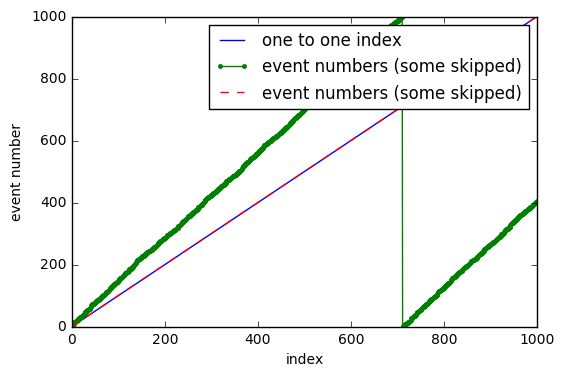

In [ ]:

#------------------------------------------------------------------------------
# Check event numbers especially boundaries
# Skipped events with no interactions so expect loss of efficiency 
#------------------------------------------------------------------------------

#indxs = np.arange(0, arr_evt.size, 1)
indxs = np.arange(0, 1000, 1)

print(arr_evt.shape)
plt.figure()
plt.plot(indxs, indxs  , '-', label='one to one index')
plt.plot(indxs, arr_evt, '.-', label='event numbers (some skipped)')
plt.plot(indxs, arr_idx, '--', label='event numbers (some skipped)')
plt.xlabel('index')
plt.ylabel('event number')
plt.legend()


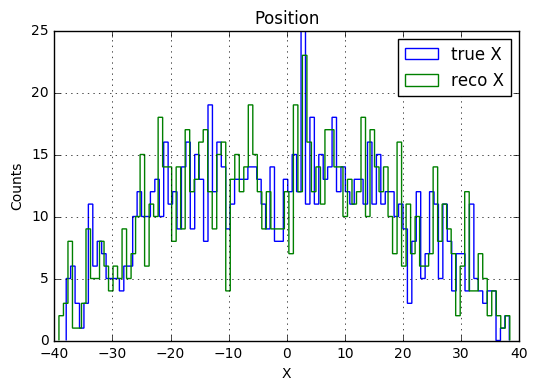

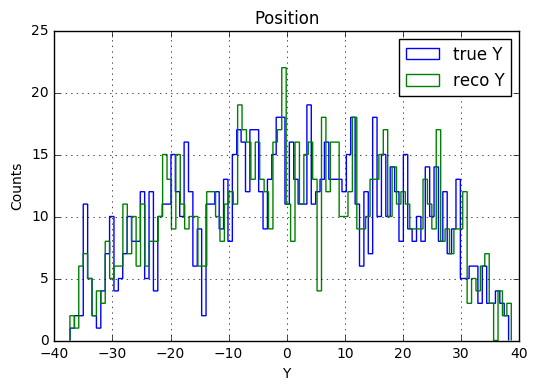

In [48]:

#------------------------------------------------------------------------------
# X, Y Position
#------------------------------------------------------------------------------

plt.figure()
plt.hist(x_true, bins=100, histtype='step', label='true X')
plt.hist(x_reco, bins=100, histtype='step', label='reco X')
plt.xlabel('X')
plt.ylabel('Counts')
plt.title('Position')
plt.grid()
plt.legend()


#------------------------------------------------------------------------------
# X, Y Position
#------------------------------------------------------------------------------

plt.figure()
plt.hist(y_true, bins=100, histtype='step', label='true Y')
plt.hist(y_reco, bins=100, histtype='step', label='reco Y')
plt.xlabel('Y')
plt.ylabel('Counts')
plt.title('Position')
plt.grid()
plt.legend()


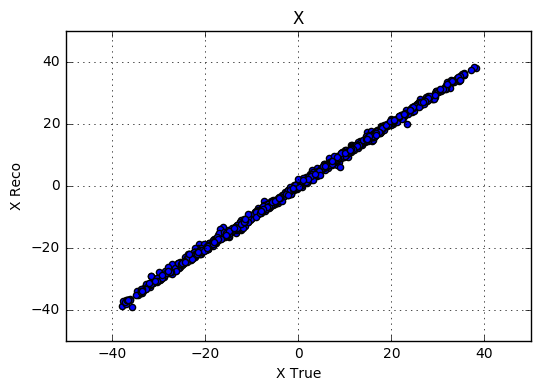

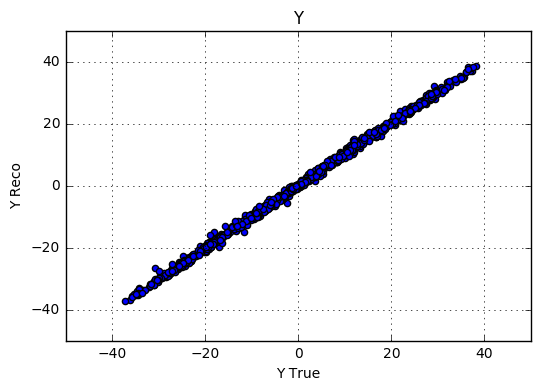

In [49]:

#------------------------------------------------------------------------------
# Scatter
#------------------------------------------------------------------------------

plt.figure()
plt.scatter(x_true, x_reco)
plt.xlabel("X True")
plt.ylabel("X Reco")
plt.title("X")
plt.grid()

plt.figure()
plt.scatter(y_true, y_reco)
plt.xlabel("Y True")
plt.ylabel("Y Reco")
plt.title("Y")
plt.grid()



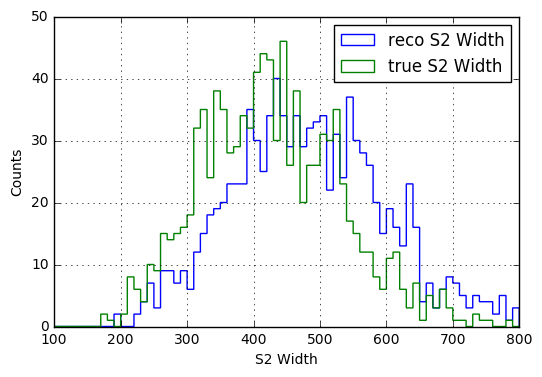

In [53]:

#------------------------------------------------------------------------------
# S2 Width
#------------------------------------------------------------------------------

plt.figure()
plt.hist(arr_width_s2  , bins=70, range=[100, 800], histtype='step', label='reco S2 Width')
plt.hist(arr_width_true, bins=70, range=[100, 800], histtype='step', label='true S2 Width')
plt.xlabel('S2 Width')
plt.ylabel('Counts')
plt.legend()
plt.grid()


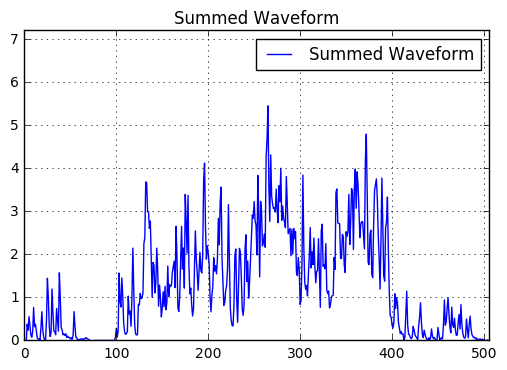

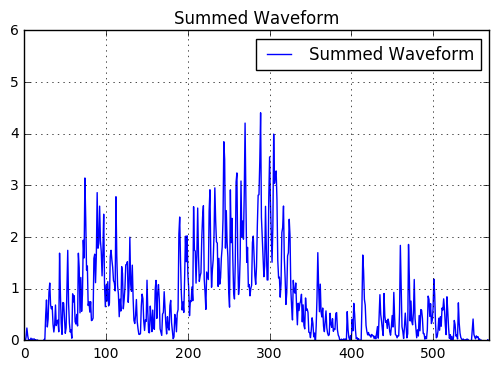

In [66]:

#------------------------------------------------------------------------------
# Waveform
#------------------------------------------------------------------------------

for idx in range(0, 2):
        
    plt.figure()
    plt.plot(arr_sum_wf[idx], label='Summed Waveform')
    plt.xlim([0, arr_width_s2[idx]])
    plt.title("Summed Waveform")
    plt.legend()
    plt.grid()
    plt.ylim([0, plt.gca().get_ylim()[1]*1.2])
    
    continue
    

In [ ]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

for idx in range(0, 1):
        
    arr_sum_wfx = arr_sum_wf[idx,:]
    s2a         = strArr[idx]['s2_area_top']
    s2areas     = strArr[idx]['s2_areas']
    sum_s2areas = np.sum(s2areas)

    sum_wf      = np.sum(arr_sum_wfx)
    diff        = sum_wf - sum_s2areas
    eq          = np.isclose(diff, 0)

    if not (eq):
        print("\nidx={0} Error! Sum of Waveform NOT Equal to Sum of Areas!".format(idx))
        print("   S2 area top:                        {0:.1f}".format(s2a))
        print("   Sum of S2 areas:                    {0:.1f}".format(sum_s2areas))
        print("   Sum of S2 sum waveform (in window): {0:.1f}".format(sum_wf))
        
    continue

